# GamersHub: Text and Opinion Mining of Reddit Comments

In the initial stages, the dataset of Reddit comments is likely collected and preprocessed. This entails tasks such as data cleaning, removal of irrelevant symbols, and potentially splitting the data into training and testing sets using train_test_split from sklearn.model_selection. In this case, the CSV file contains 21,821 rows and 3 columns. Each row in the CSV file likely represents a separate record or data point, while each of the 3 columns likely holds different attributes, variables, or fields associated with the data. 

To convert the text data into a format suitable for analysis, the project employs the CountVectorizer and TfidfVectorizer from sklearn.feature_extraction.text. These techniques transform the comments into numerical vectors, enabling machine learning algorithms to process and analyze the text data effectively.

For a deeper understanding of the underlying themes within the comments, the project utilizes LatentDirichletAllocation from sklearn.decomposition to perform topic modeling. This aids in uncovering latent topics or patterns within the discussions, contributing valuable insights into prevalent themes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from textblob import TextBlob
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from nltk.sentiment import SentimentIntensityAnalyzer

       Unnamed: 0                                            comment sentiment
0               0  dont think like game havent even played minute...  negative
1               1  leave farm smaller creature either wait help k...  negative
2               2  nothing beat feeling get see fall love like ye...  positive
3               3  also theyre made paper edit tried make gif fai...  negative
4               4  haha exactly brother tried get wow run raid ge...  positive
...           ...                                                ...       ...
21816       23184                                         dont angry  positive
21817       23185  human free developed relationship esteemed fellow  positive
21818       23186                       dont call shot around mister   neutral
21819       23187                  sorry going edit beauty mark face  positive
21820       23188         haha put part face kept disappearing fixed  positive

[21821 rows x 3 columns]
65463
(21821, 3)
<bound me

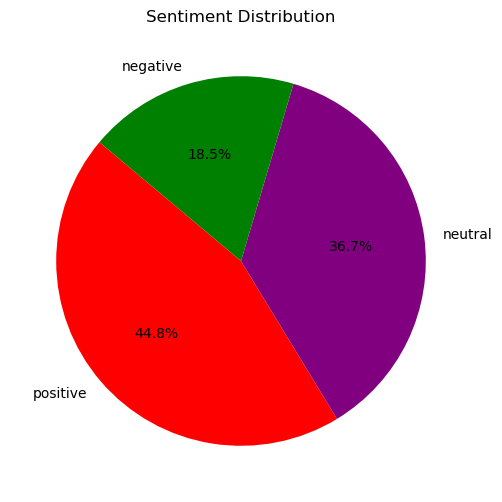

In [2]:
data = pd.read_csv("F:\Jupyter\Projects\cleaned_comments.csv")

print(data)
print(data.size)
print(data.shape)
print(data.info)

sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'purple', 'green'])
plt.title('Sentiment Distribution')
plt.show()

In [3]:
data_drop = data.drop(columns=['Unnamed: 0'])

def preprocessing_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        text = text.lower()
        return text
    else:
        return ''

data['cleaned_comment'] = data['comment'].apply(preprocessing_text)
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_comment'], data['sentiment'], test_size=0.2, random_state=42)
print(X_train.head(10))

21197                              really dont know cringe
14353    pretty clear gender swap comic showing lot wom...
13357                      coddled life better opportunity
15692                      dont care shut plus youre woman
2783                        try game called striking viper
14986                                           dont think
21064           dang post wont able upvoted commented soon
20122    would never work mobile without sort portable ...
16185                   mustve seen brighter side internet
10263                                  rfoundthemobileuser
Name: cleaned_comment, dtype: object


In [4]:
# TF-IDF Vectorization, SVM Model Training and Model evaluation

tfidf_vector = TfidfVectorizer()
X_train_tfidf = tfidf_vector.fit_transform(X_train)
X_test_tfidf = tfidf_vector.transform(X_test)

svm_model = SVC(C=1.0, kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.53      0.60       789
     neutral       0.76      0.81      0.78      1614
    positive       0.83      0.87      0.85      1962

    accuracy                           0.78      4365
   macro avg       0.76      0.73      0.74      4365
weighted avg       0.78      0.78      0.78      4365



 - The model seems to perform best on the "positive" class, as it has the highest precision, recall, and F1-score.
 - The "neutral" class also has good precision, recall, and F1-score.
 - The "negative" class has the lowest recall among all classes, which suggests that the model struggles more to identify   instances of this class.
-  The overall accuracy of the model is 0.78, which means it correctly predicts the class for around 78% of the instances.

# Most important words for each topic and create coherent labels Using LDA

In [5]:
data = data.dropna(subset=['comment'])

tfidf_vector = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vector.fit_transform(data['comment'])
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_result = lda.fit_transform(X_tfidf)

topic_labels = []
for topic_weights in lda.components_:
    topic_words = [tfidf_vector.get_feature_names_out()[i] for i in topic_weights.argsort()[:-11:-1]]
    coherent_label = ', '.join(topic_words)
    topic_labels.append(coherent_label)

for i, label in enumerate(topic_labels):
    print(f"Topic {i}: {label}")

Topic 0: like, people, woman, guy, girl, game, dont, youre, im, think
Topic 1: oh, look, like, fuck, win, amazing, say, legend, boy, game
Topic 2: got, love, lol, year, time, game, parent, minesweeper, awesome, nice
Topic 3: controller, pc, use, care, work, post, xbox, dont, wait, steam
Topic 4: game, play, im, friend, know, like, wow, playing, hour, time


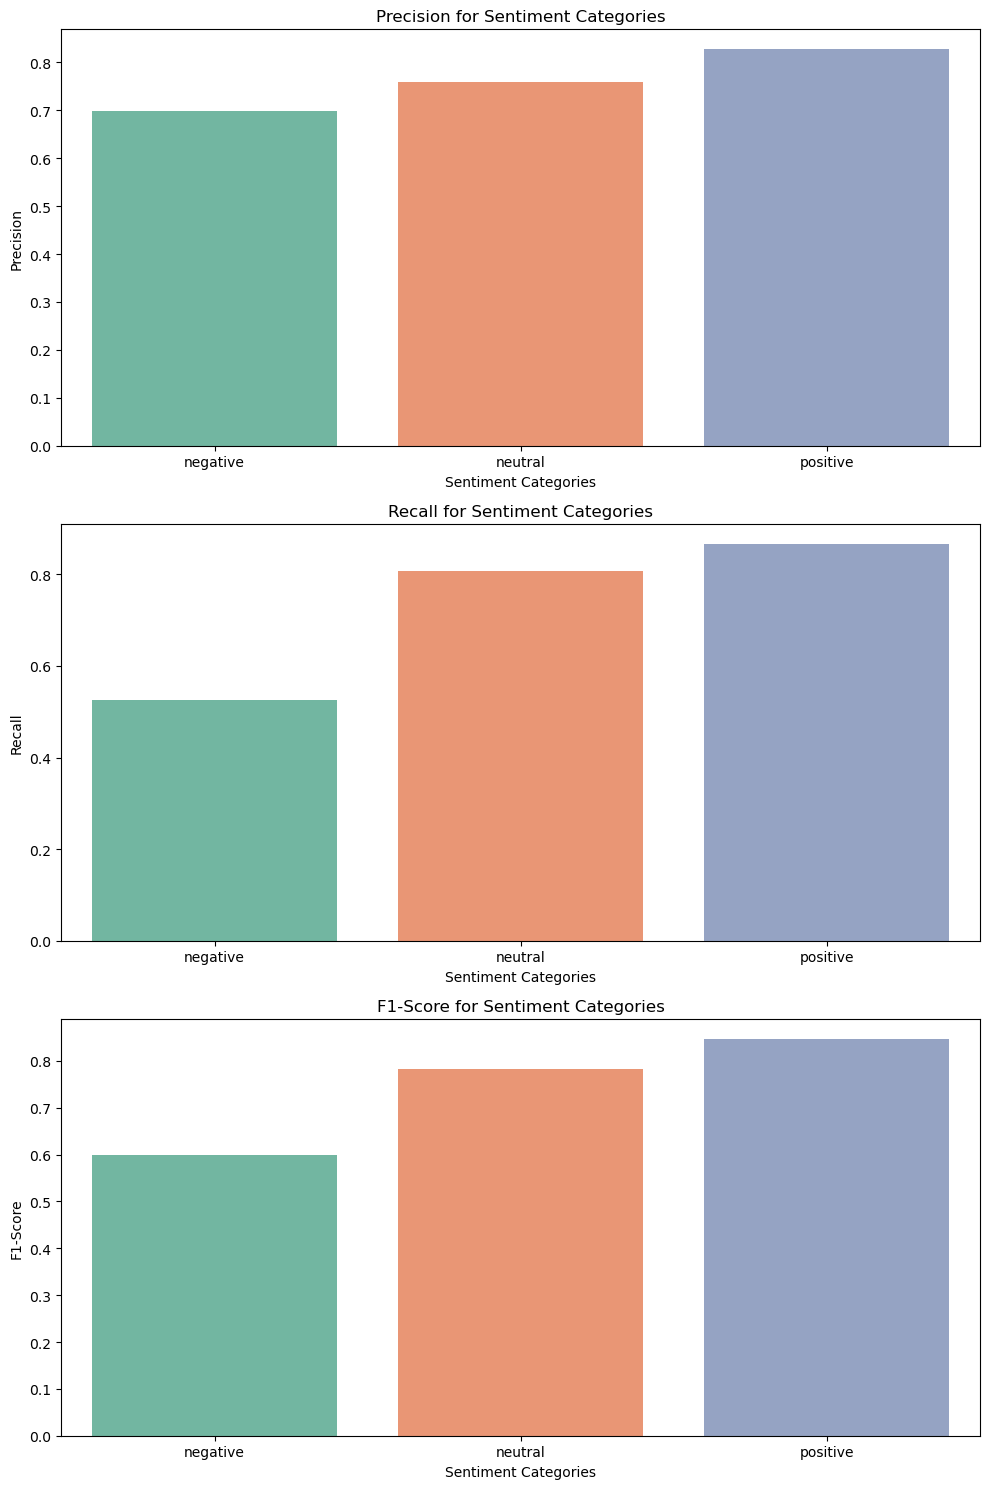

In [6]:
report = classification_report(y_test, y_pred, output_dict=True)
class_names = ['negative', 'neutral', 'positive']

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.set_palette("Set2")

# Precision graph
sns.barplot(x=class_names, y=[report[label]['precision'] for label in class_names], ax=axs[0])
axs[0].set_title('Precision for Sentiment Categories')
axs[0].set_xlabel('Sentiment Categories')
axs[0].set_ylabel('Precision')

# Recall graph
sns.barplot(x=class_names, y=[report[label]['recall'] for label in class_names], ax=axs[1])
axs[1].set_title('Recall for Sentiment Categories')
axs[1].set_xlabel('Sentiment Categories')
axs[1].set_ylabel('Recall')

# F1-Score graph
sns.barplot(x=class_names, y=[report[label]['f1-score'] for label in class_names], ax=axs[2])
axs[2].set_title('F1-Score for Sentiment Categories')
axs[2].set_xlabel('Sentiment Categories')
axs[2].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()

# Preprocessing using CountVectorizer and Get the top 20 words and their counts

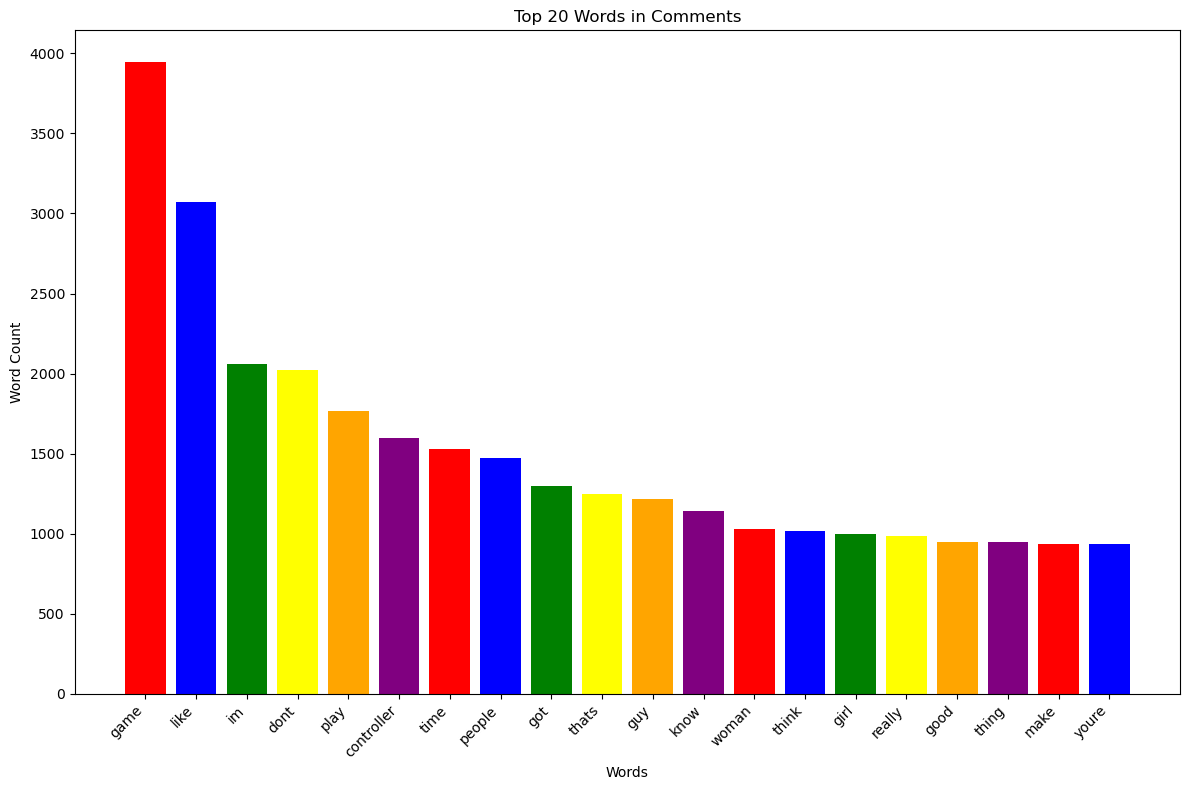

In [7]:

count_vectorizer = CountVectorizer(stop_words='english', max_features=20)
X_count = count_vectorizer.fit_transform(data['comment'])

word_counts = X_count.sum(axis=0)
top_words = [word for word, count in sorted(zip(count_vectorizer.get_feature_names_out(), word_counts.tolist()[0]), key=lambda x: x[1], reverse=True)[:20]]
top_word_counts = sorted(word_counts.tolist()[0], reverse=True)[:20]

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple']
plt.figure(figsize=(12, 8))
plt.bar(top_words, top_word_counts, color=colors)
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.title('Top 20 Words in Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Accuracy: 0.78
Confusion Matrix:
[[ 415  228  146]
 [ 102 1304  208]
 [  77  186 1699]]


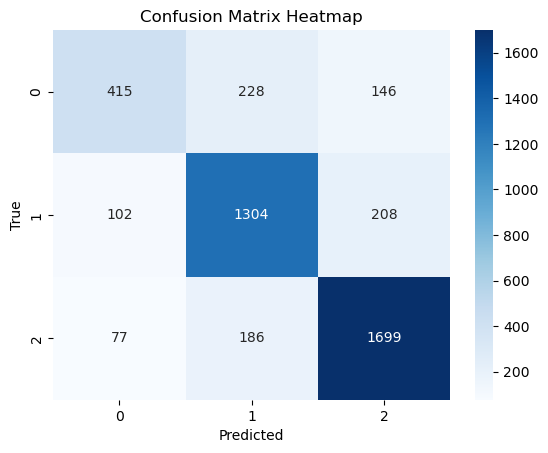

In [8]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [9]:
# Create a word cloud for each sentiment category
positive_comments = " ".join(data[data['sentiment'] == 'positive']['comment'])
negative_comments = " ".join(data[data['sentiment'] == 'negative']['comment'])
neutral_comments = " ".join(data[data['sentiment'] == 'neutral']['comment'])


wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate(positive_comments)
wordcloud_negative = WordCloud(width=800, height=800, background_color='white').generate(negative_comments)
wordcloud_neutral = WordCloud(width=800, height=800, background_color='white').generate(neutral_comments)


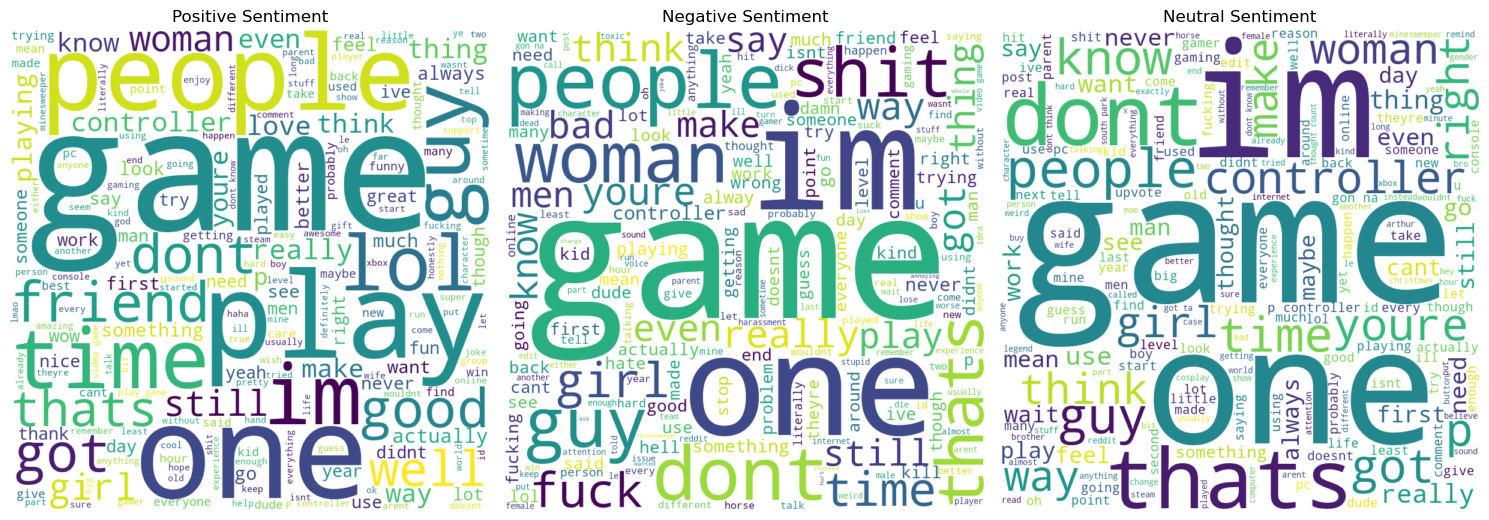

In [10]:

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

##  What Kinds of Games Do They Mostly Talk About?

In [11]:
# List of game titles or keywords to search for
game_keywords = ['LOL', 'COD', 'PUBG', 'Valorant', 'Minecraft', 'Fortnite', 'Destiny', 'Apex Legend', 'CSGO', 'AOE', 'Overwatch', 'DOTA', 'Genshin Impact', 'Rainbow Six Siege', 'Cyberpunk', 'Amongus']  

def extract_game_mentions(comment, game_keywords):
    mentions = []
    for keyword in game_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', comment, flags=re.I):
            mentions.append(keyword)
    return mentions

data['game_mentions'] = data['comment'].apply(lambda x: extract_game_mentions(x, game_keywords))

# Flatten the list of game mentions
all_game_mentions = [mention for mentions in data['game_mentions'] for mention in mentions]

game_mention_counts = Counter(all_game_mentions)
print(game_mention_counts)

Counter({'LOL': 737, 'Minecraft': 112, 'Overwatch': 85, 'COD': 69, 'Destiny': 52, 'DOTA': 48, 'CSGO': 46, 'Cyberpunk': 45, 'Fortnite': 36, 'PUBG': 22, 'Valorant': 17, 'Rainbow Six Siege': 6, 'Apex Legend': 3, 'AOE': 2, 'Genshin Impact': 2, 'Amongus': 1})


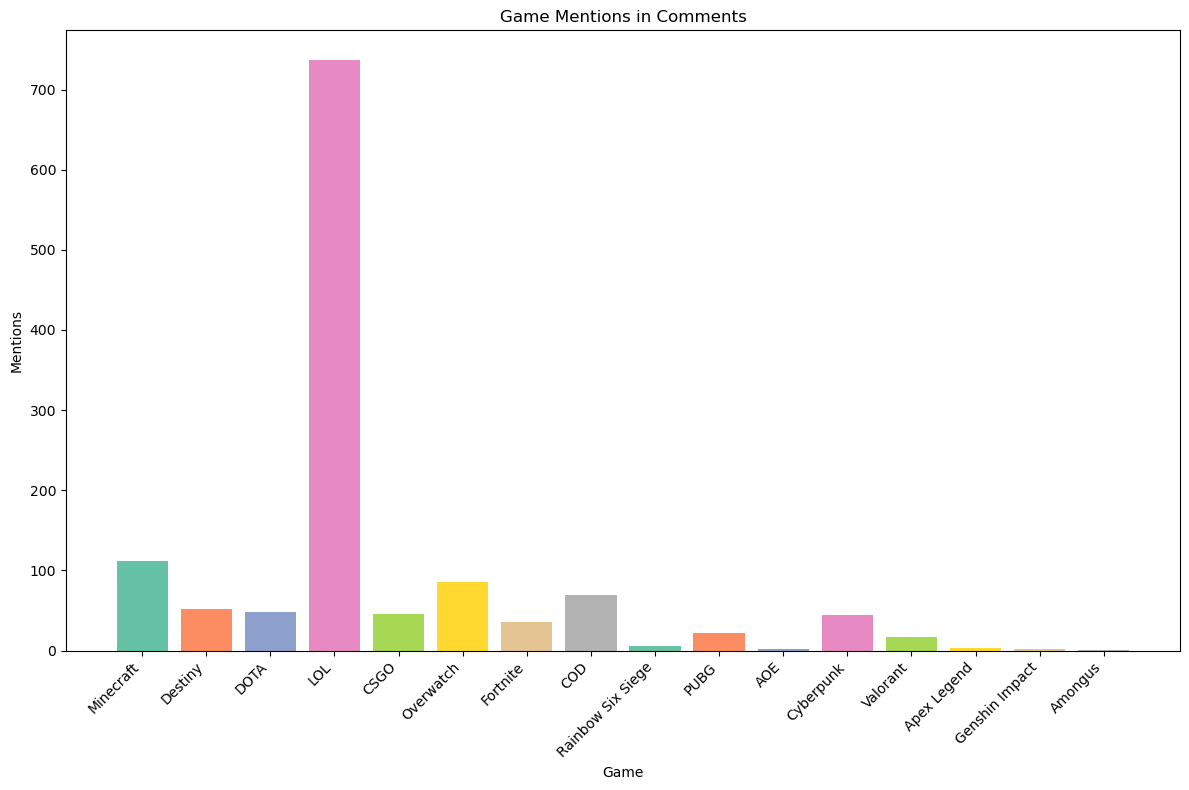

In [12]:
color_palette = sns.color_palette("Set2", len(game_mention_counts))

plt.figure(figsize=(12, 8))
plt.bar(game_mention_counts.keys(), game_mention_counts.values(), color=color_palette)
plt.xlabel('Game')
plt.ylabel('Mentions')
plt.title('Game Mentions in Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

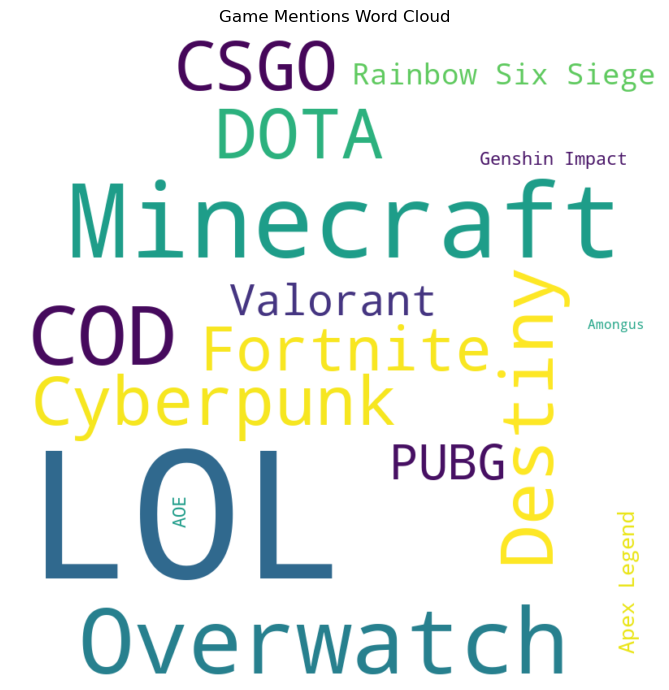

In [13]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(game_mention_counts)


plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Game Mentions Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

# Sentiment Analysis using NLTK's SentimentIntensityAnalyzer and filter comments mentioning specific games

In [20]:
nltk.download('vader_lexicon')

# List of specific games to analyze
games_to_analyze = ['LOL', 'COD', 'PUBG', 'Valorant', 'Minecraft', 'Fortnite', 'Destiny', 'Apex Legend', 'CSGO', 'AOE', 'Overwatch', 'DOTA', 'Genshin Impact', 'Rainbow Six Siege', 'Cyberpunk'] 

specific_games_df = data[data['comment'].str.contains('|'.join(games_to_analyze), case=False)]

sentiment = SentimentIntensityAnalyzer()
specific_games_df['sentiment_score'] = specific_games_df['comment'].apply(lambda text: sentiment.polarity_scores(text)['compound'])
specific_games_df['sentiment'] = specific_games_df['sentiment_score'].apply(lambda score: 'Positive' if score > 0.4 else 'Negative')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PERSONAL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_22732\3106008445.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_games_df['sentiment_score'] = specific_games_df['comment'].apply(lambda text: sentiment.polarity_scores(text)['compound'])
C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_22732\3106008445.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

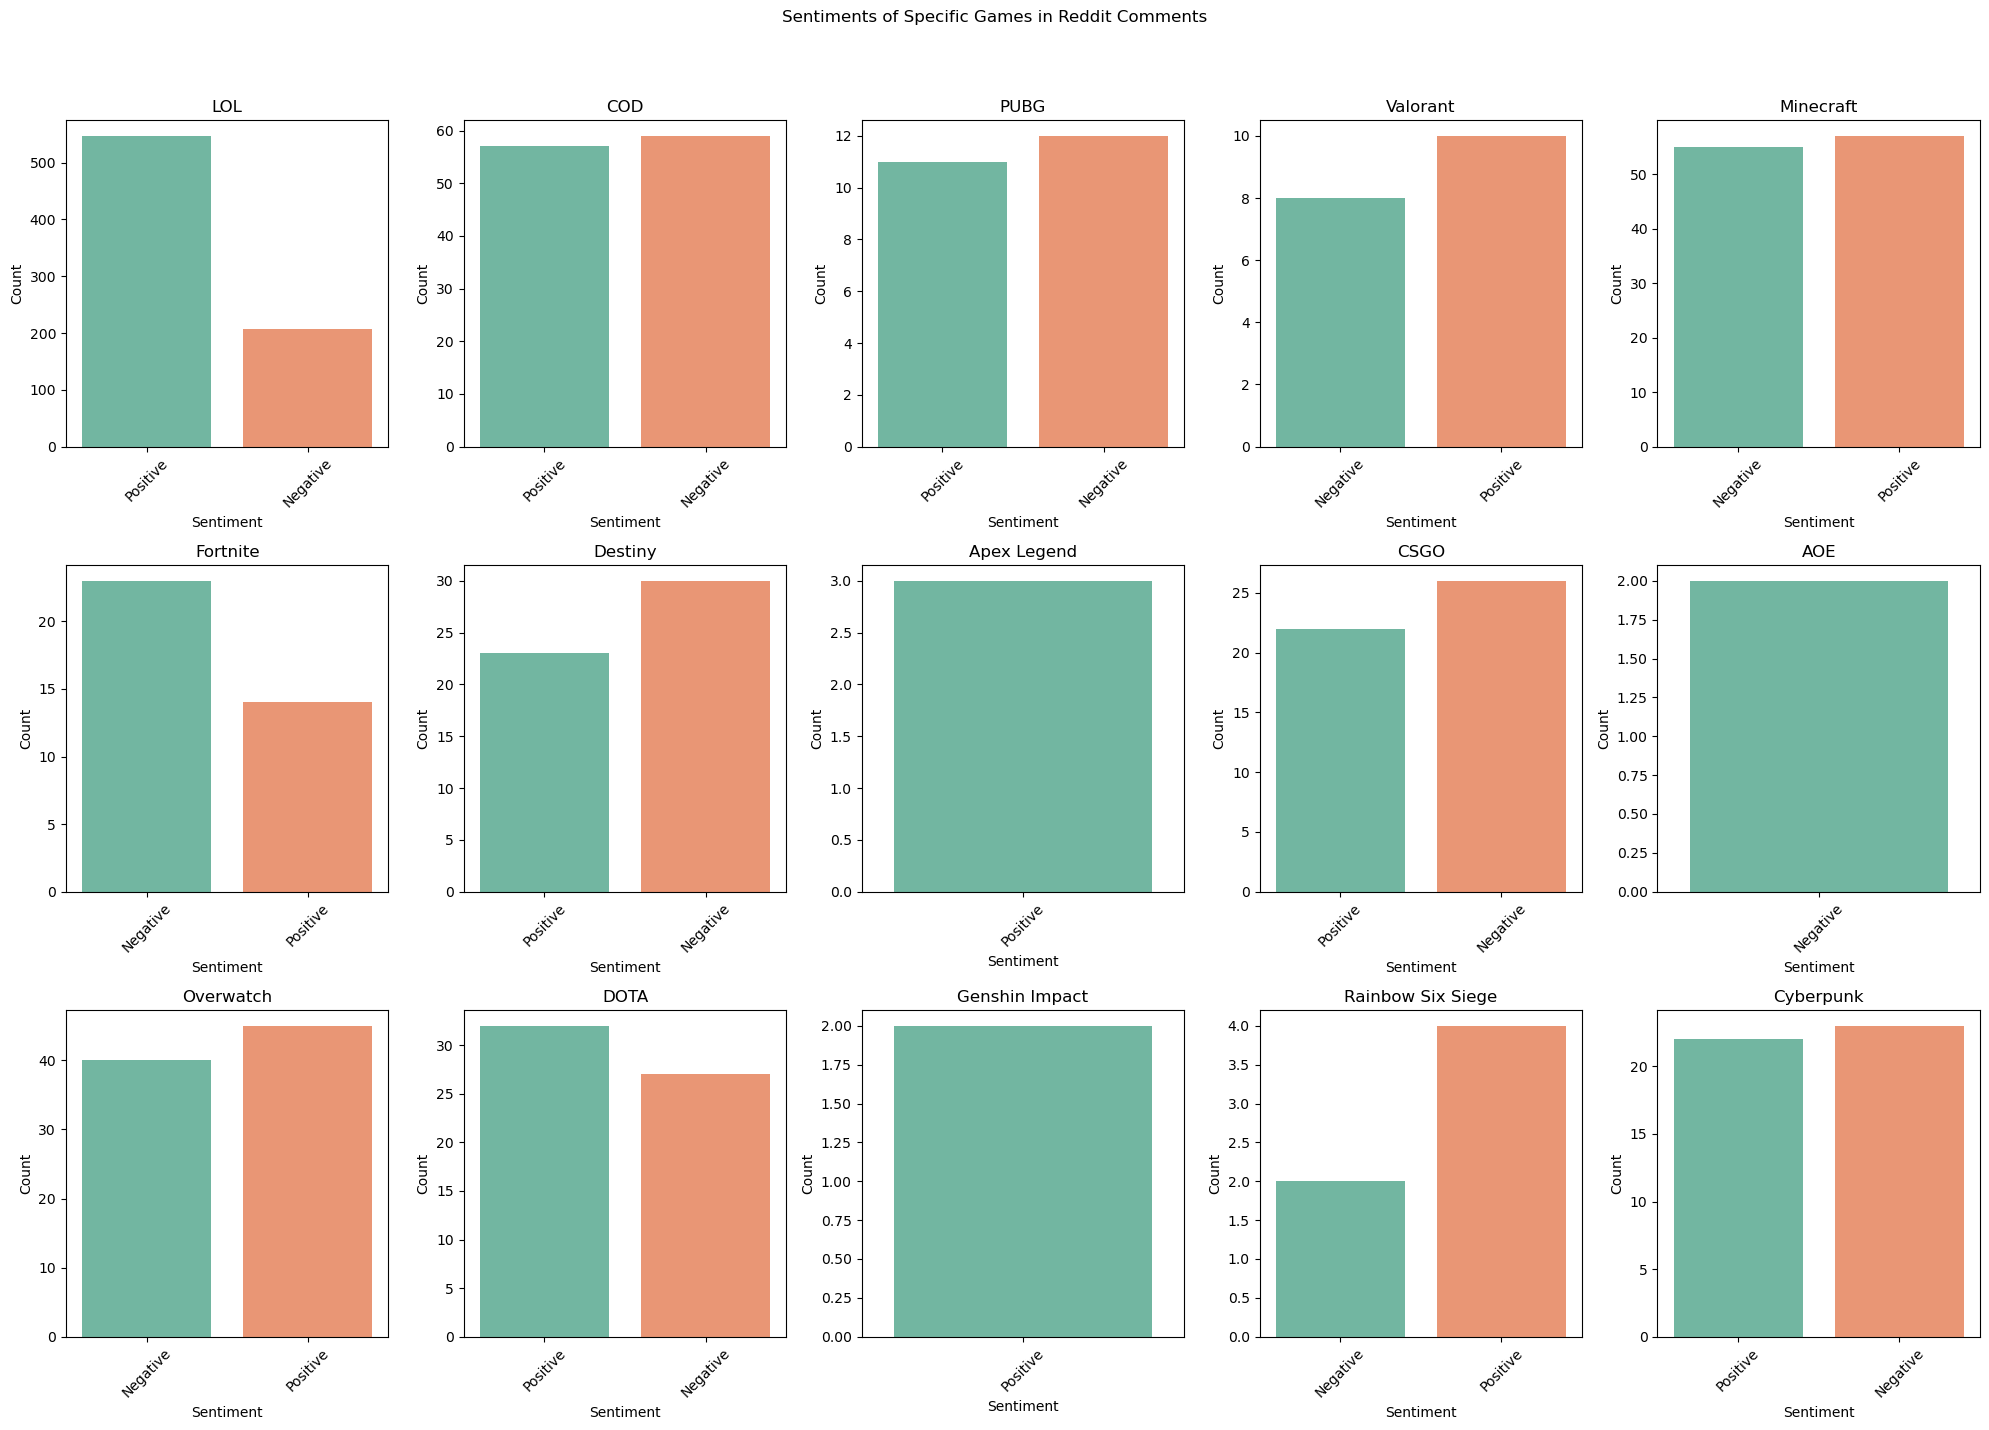

In [21]:
num_rows = 3  
num_cols = 5  
plt.figure(figsize=(20, 15))

for i, game in enumerate(games_to_analyze, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x='sentiment', data=specific_games_df[specific_games_df['comment'].str.contains(game, case=False)])
    plt.title(f'{game}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.suptitle('Sentiments of Specific Games in Reddit Comments')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

# Apply Opinion Mining to Each Comment

In [22]:
def extract_words(text):
    words = re.findall(r'\b\w+\b', text.lower())  
    return words

def perform_opinion_mining(text):
    blob = TextBlob(text)
    opinions = []

    for sentence in blob.sentences:
        aspect = ""  
        sentiment = sentence.sentiment.polarity
        if sentiment > 0:
            opinion = "positive"
        elif sentiment < 0:
            opinion = "negative"
        else:
            opinion = "neutral"
        opinions.append((aspect, opinion, sentence))

    return opinions

In [23]:
opinions_per_comment = [perform_opinion_mining(comment) for comment in data['comment']]

all_words = []
for opinions in opinions_per_comment:
    for _, _, sentence in opinions:
        words = extract_words(str(sentence))  
        all_words.extend(words)


word_frequencies = Counter(all_words)


num_most_common = 10  
most_common_words = word_frequencies.most_common(num_most_common)

print(f"Top {num_most_common} Most Common Words:")
for word, frequency in most_common_words:
    print(f"- Word: {word}, Frequency: {frequency}")

Top 10 Most Common Words:
- Word: game, Frequency: 3946
- Word: like, Frequency: 3071
- Word: get, Frequency: 2205
- Word: one, Frequency: 2178
- Word: im, Frequency: 2058
- Word: dont, Frequency: 2022
- Word: play, Frequency: 1769
- Word: controller, Frequency: 1597
- Word: time, Frequency: 1532
- Word: people, Frequency: 1476


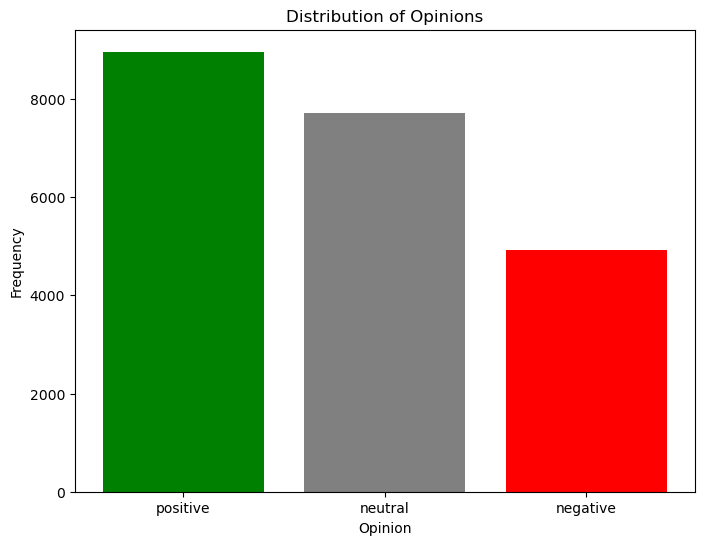

In [24]:
# Count the distribution of positive, negative, and neutral opinions
opinion_counts = Counter(opinion for opinions in opinions_per_comment for aspect, opinion, sentence in opinions)

opinion_labels = ['positive', 'neutral', 'negative']
opinion_values = [opinion_counts[label] for label in opinion_labels]

plt.figure(figsize=(8, 6))
plt.bar(opinion_labels, opinion_values, color=['green', 'gray', 'red'])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.title('Distribution of Opinions')
plt.show()